In [1]:
import tensorflow as tf
from tensorflow.keras import layers, losses
import matplotlib.pyplot as plt

#### CIFAR10 dataset
* 60,000 color images
* 10 classes
* 6,000 images in each class
* 50,000 training
* 10,000 testing

[tf.keras.datasets.cifar10.load_data](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data)

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

#### Verify Data

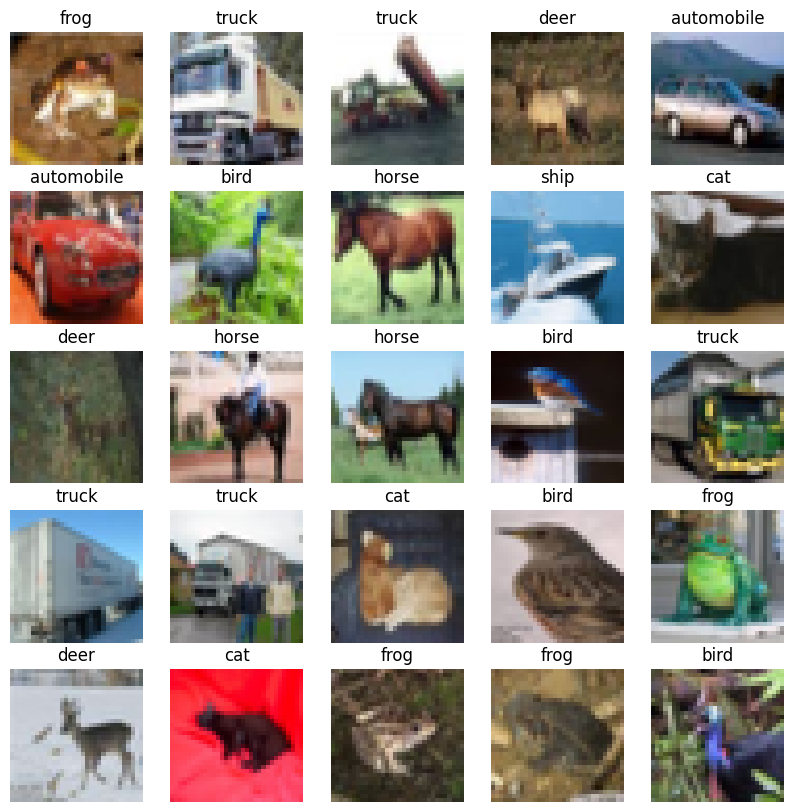

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis(False)

#### Create the model

In [5]:
model = tf.keras.Sequential([
    layers.Rescaling(1/255, input_shape=(32, 32, 3)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          3

* The width and height dimensions tend to shrink as you go deeper in the network

#### Compile and train the model

In [7]:
model.compile(optimizer='adam',
                loss=losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 17s 10ms/step - loss: 1.5713 - accuracy: 0.4229 - val_loss: 1.3149 - val_accuracy: 0.5326
Epoch 2/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.2173 - accuracy: 0.5667 - val_loss: 1.1295 - val_accuracy: 0.5945
Epoch 3/10
1563/1563 [==============================] - 13s 9ms/step - loss: 1.0697 - accuracy: 0.6228 - val_loss: 1.0731 - val_accuracy: 0.6193
Epoch 4/10
1563/1563 [==============================] - 13s 9ms/step - loss: 0.9841 - accuracy: 0.6543 - val_loss: 0.9705 - val_accuracy: 0.6648
Epoch 5/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.9163 - accuracy: 0.6790 - val_loss: 0.9700 - val_accuracy: 0.6564
Epoch 6/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.8569 - accuracy: 0.6995 - val_loss: 0.9323 - val_accuracy: 0.6823
Epoch 7/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.8112 - accuracy: 0.7172 - val_loss: 0.9076 - val_

#### Evaluate the model

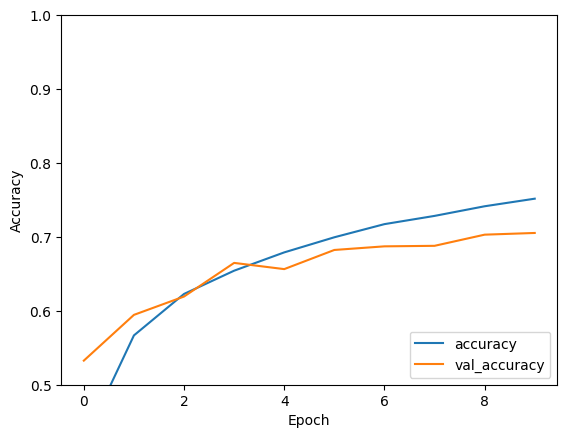

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [9]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(test_accuracy)

313/313 - 1s - loss: 0.8554 - accuracy: 0.7053 - 1s/epoch - 5ms/step
0.705299973487854
